# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

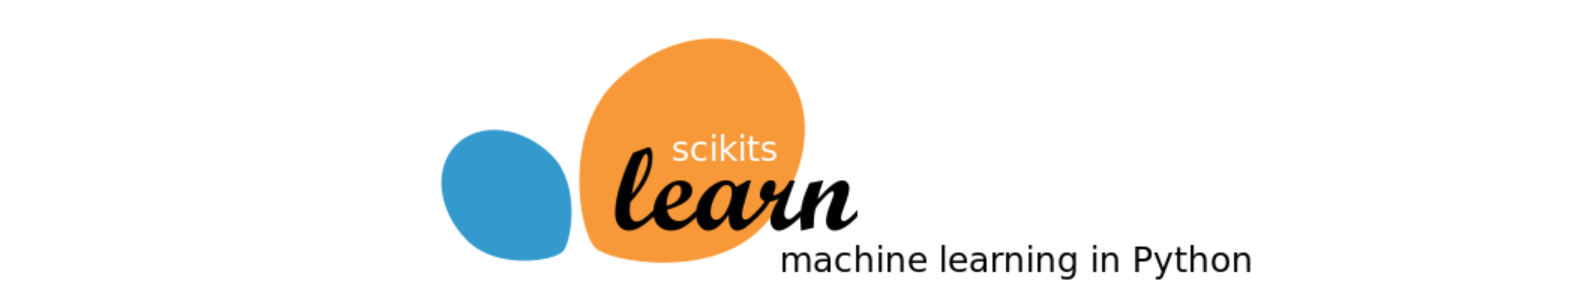

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from file1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [698]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [699]:
df1=pd.read_csv("file1.csv" ,
               names=["A","B","C","D","E","F","G","H","I","J"])
df1.head()

A  B  C  D  E   F  G  H  I  J
0  5  1  1  1  2   1  3  1  1  2
1  5  4  4  5  7  10  3  2  1  2
2  3  1  1  1  2   2  3  1  1  2
3  6  8  8  1  3   4  3  7  1  2
4  4  1  1  3  2   1  3  1  1  2

In [700]:
df1.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
dtype: int64

In [701]:
df1.shape

(699, 10)

In [702]:
df1['F'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [703]:
df1.replace('?',np.nan,inplace=True)
df1.head()

A  B  C  D  E   F  G  H  I  J
0  5  1  1  1  2   1  3  1  1  2
1  5  4  4  5  7  10  3  2  1  2
2  3  1  1  1  2   2  3  1  1  2
3  6  8  8  1  3   4  3  7  1  2
4  4  1  1  3  2   1  3  1  1  2

In [704]:
df1.isna().sum()

A     0
B     0
C     0
D     0
E     0
F    16
G     0
H     0
I     0
J     0
dtype: int64

In [705]:
df1.fillna(method='bfill',inplace=True)
df1.head()

A  B  C  D  E   F  G  H  I  J
0  5  1  1  1  2   1  3  1  1  2
1  5  4  4  5  7  10  3  2  1  2
2  3  1  1  1  2   2  3  1  1  2
3  6  8  8  1  3   4  3  7  1  2
4  4  1  1  3  2   1  3  1  1  2

In [706]:
df1.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
dtype: int64

### Elbow method

In [707]:
K = np.arange(1,10)
SSD = []
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df1)
    SSD.append(kmean.inertia_)

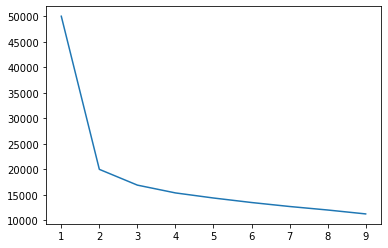

In [708]:
plt.plot(K,SSD)
plt.show()

# model

In [709]:
kmean= KMeans(n_clusters=3)
kmean.fit(df1)

KMeans(n_clusters=3)

In [710]:
kmean.labels_

array([1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2,

In [711]:
pred_k = kmean.fit_predict(df1)
print("silhouette_score: ",silhouette_score(df1,pred_k))

silhouette_score:  0.5168573024110874


### silhouette_score

In [712]:
K = np.arange(2,10)
sil_score = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df1)
    sil_score.append(silhouette_score(df1,km.labels_))

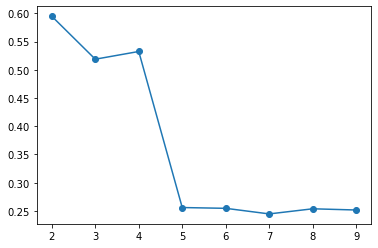

In [713]:
plt.plot(K,sil_score,'-o')

### model

In [714]:
kmean= KMeans(n_clusters=5)
kmean.fit(df1)

KMeans(n_clusters=5)

In [715]:
kmean.labels_

array([4, 2, 0, 1, 4, 3, 0, 0, 0, 4, 0, 0, 4, 0, 3, 1, 4, 4, 2, 4, 2, 1,
       0, 4, 0, 2, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 1, 4, 2, 2, 1, 1, 3, 1,
       1, 0, 2, 0, 4, 1, 4, 4, 1, 3, 2, 1, 1, 4, 2, 4, 1, 0, 1, 1, 0, 4,
       4, 2, 3, 0, 4, 1, 0, 2, 2, 0, 0, 4, 0, 0, 0, 4, 4, 0, 3, 1, 2, 3,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 1, 3, 1, 4, 4, 4, 1, 4, 2, 3, 0, 2,
       0, 2, 2, 1, 0, 0, 4, 3, 0, 0, 0, 4, 3, 2, 3, 0, 2, 0, 2, 0, 4, 0,
       3, 0, 0, 4, 4, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 4, 3, 0, 2, 1, 4,
       0, 2, 0, 0, 0, 3, 2, 4, 0, 0, 4, 4, 3, 1, 0, 0, 0, 0, 0, 3, 2, 3,
       0, 1, 4, 2, 0, 0, 4, 3, 2, 0, 3, 3, 3, 0, 3, 3, 4, 0, 0, 4, 2, 4,
       0, 0, 3, 2, 0, 4, 0, 3, 1, 0, 0, 4, 3, 3, 0, 3, 3, 1, 0, 0, 1, 4,
       0, 3, 4, 2, 2, 0, 2, 1, 0, 3, 2, 3, 4, 2, 4, 2, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 4, 3, 2, 4, 0, 0, 2, 2, 3, 1, 2, 0, 0, 0, 2, 2, 3, 3, 2,
       1, 4, 2, 2, 1, 0, 2, 4, 2, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 3,
       3, 0, 2, 3, 0, 0, 2, 2, 0, 2, 2, 4, 4, 2, 1,

In [716]:
kmean.inertia_

14327.67735723365

In [717]:
kmean.cluster_centers_

array([[1.78676471, 1.11764706, 1.19852941, 1.13602941, 1.97794118,
        1.36397059, 2.01102941, 1.0625    , 1.07352941, 2.        ],
       [7.65      , 7.68333333, 7.2       , 4.5       , 6.13333333,
        3.6       , 5.71666667, 7.21666667, 2.36666667, 3.86666667],
       [7.17171717, 4.84848485, 5.04040404, 4.68686869, 4.05050505,
        9.23232323, 5.22222222, 3.92929293, 1.63636364, 3.83838384],
       [6.64556962, 8.3164557 , 8.34177215, 7.75949367, 6.69620253,
        9.34177215, 7.3164557 , 7.83544304, 3.73417722, 3.97468354],
       [4.8042328 , 1.52910053, 1.72486772, 1.61904762, 2.17989418,
        1.35449735, 2.21164021, 1.44973545, 1.16402116, 2.16931217]])

In [718]:
pred_s = kmean.fit_predict(df1)
print("silhouette_score: ",silhouette_score(df1,pred_s))

silhouette_score:  0.25583839579260836


after looking into the score of the two model(one with elbow method and other with silhouette_score), elbow method gives the best value of k which is 3. 

# Part B

### INSTRUCTIONS
1. Read data from file2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [719]:
df2=pd.read_csv("file2.csv" ,
               names=['x','y'])
df2.head()

x         y
0 -0.999326  1.748467
1  1.557994  0.255070
2 -0.955949  1.675355
3 -1.204858  0.037380
4 -0.612919 -0.390663

In [720]:
df2.isna().sum()

x    0
y    0
dtype: int64

In [721]:
df2.shape

(100, 2)

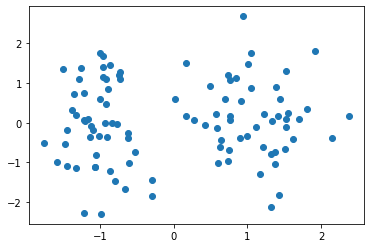

In [722]:
plt.scatter(df2['x'],df2['y'])
plt.show()

### Kmean because points as uniformly distributed into two parts

In [723]:
kmean2= KMeans(n_clusters=4)
kmean2.fit(df2)

KMeans(n_clusters=4)

In [724]:
kmean2.labels_

array([0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 2, 0, 0, 2, 3, 2, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 1, 1, 3, 1, 0, 3, 2, 2, 2, 1, 0, 3, 1, 2, 2, 1, 2, 1, 3, 2, 1,
       2, 1, 0, 2, 1, 3, 2, 2, 0, 3, 0, 2, 3, 2, 1, 0, 3, 1, 0, 1, 1, 1,
       2, 2, 0, 1, 3, 0, 1, 3, 2, 3, 3, 0], dtype=int32)

In [725]:
centroid=kmean2.cluster_centers_
centroid

array([[-0.99777621,  1.02275006],
       [ 1.14557685, -0.37211963],
       [-1.00115032, -0.75496908],
       [ 0.99628413,  1.22581605]])

In [726]:
df2['cluster'] = kmean2.labels_
df2.head()

x         y  cluster
0 -0.999326  1.748467        0
1  1.557994  0.255070        1
2 -0.955949  1.675355        0
3 -1.204858  0.037380        2
4 -0.612919 -0.390663        2

In [727]:
cluster0 = df2[df2.cluster == 0]

In [728]:
cluster1= df2[df2.cluster == 1]

In [729]:
cluster2= df2[df2.cluster == 2]

In [730]:
cluster3= df2[df2.cluster == 3]

In [731]:
centeriod1=pd.DataFrame(data=kmean2.cluster_centers_,columns=['a','b'])
centeriod1

a         b
0 -0.997776  1.022750
1  1.145577 -0.372120
2 -1.001150 -0.754969
3  0.996284  1.225816

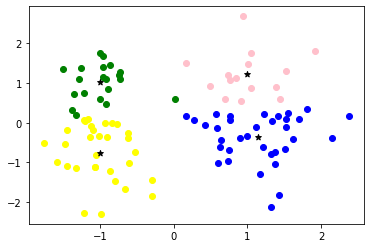

In [732]:
plt.scatter(cluster0['x'],cluster0['y'],color='green')
plt.scatter(cluster1['x'],cluster1['y'],color='blue')
plt.scatter(cluster2['x'],cluster2['y'],color='yellow')
plt.scatter(cluster3['x'],cluster3['y'],color='pink')
plt.scatter(centeriod1.a,centeriod1.b,color='black',marker='*',label='centroid') 
plt.show()

In [733]:
pred_df2 = kmean2.fit_predict(df2)
print("silhouette_score: ",silhouette_score(df2,pred_df2))

silhouette_score:  0.6358650782696519


In [734]:
K = np.arange(1,10)
SSD = []
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df2)
    SSD.append(kmean.inertia_)

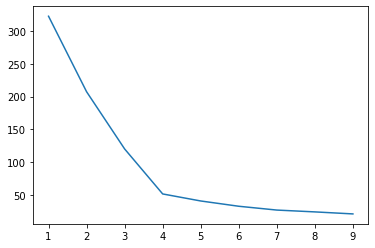

In [735]:
plt.plot(K,SSD)
plt.show()

in this dataset, given the 4 cluster gives the best score because higher the number of clusters means less distance between the points which probably increases the score

# Part C

### INSTRUCTIONS:

1. Read data from file3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [736]:
df3=pd.read_csv("file3.csv" ,
               names=['x','y'])
df3.head()

x         y
0  5.464028 -6.377369
1 -0.626877  0.307585
2 -0.574917 -2.120564
3 -1.282412  0.106262
4  4.502644 -5.152151

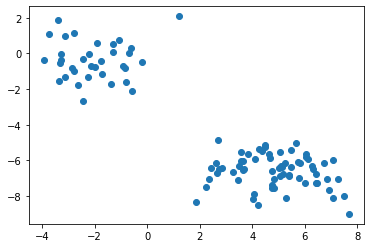

In [737]:
plt.scatter(df3['x'],df3['y'])
plt.show()

### kmean

In [738]:
kmean3= KMeans(n_clusters=4)
kmean3.fit(df3)

KMeans(n_clusters=4)

In [739]:
kmean3.labels_

array([1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 2, 1, 1,
       3, 0, 2, 0, 0, 3, 3, 3, 1, 0, 1, 1, 1, 3, 2, 2, 0, 1, 3, 2, 0, 2,
       0, 3, 0, 0, 3, 2, 1, 1, 1, 3, 3, 2, 0, 1, 1, 3, 1, 1, 3, 3, 0, 1,
       1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 3, 0, 0, 1, 3, 1, 0, 0, 3, 3, 3, 3,
       3, 3, 0, 1, 3, 1, 1, 3, 1, 1, 0, 1], dtype=int32)

In [740]:
df3['cluster'] = kmean3.labels_
df3.head()

x         y  cluster
0  5.464028 -6.377369        1
1 -0.626877  0.307585        2
2 -0.574917 -2.120564        2
3 -1.282412  0.106262        2
4  4.502644 -5.152151        3

In [741]:
cluster0 = df3[df3.cluster == 0]

In [742]:
cluster1 = df3[df3.cluster == 1]

In [743]:
cluster2 = df3[df3.cluster == 2]

In [744]:
cluster3 = df3[df3.cluster == 3]

In [745]:
centeriod=pd.DataFrame(data=kmean3.cluster_centers_,columns=['a','b'])
centeriod

a         b
0 -2.891776 -0.434094
1  5.864007 -6.745174
2 -0.922832 -0.305491
3  3.497134 -6.414614

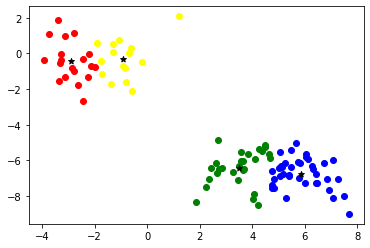

In [746]:
plt.scatter(cluster0['x'],cluster0['y'],color='red')
plt.scatter(cluster1['x'],cluster1['y'],color='blue')
plt.scatter(cluster2['x'],cluster2['y'],color='yellow')
plt.scatter(cluster3['x'],cluster3['y'],color='green')
plt.scatter(centeriod.a,centeriod.b,color='black',marker='*',label='centroid') 
plt.show()

In [747]:
pred_df3 = kmean3.fit_predict(df3)
print("silhouette_score: ",silhouette_score(df3,pred_df3))

silhouette_score:  0.5398069195908444


### DBSCAN

In [748]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=4)
# fitting model
dbscan.fit(df3)
y_pred=dbscan.fit_predict(df3)

In [749]:
y_pred

array([ 0,  1,  1,  1,  2,  2,  1,  0,  1,  0,  0,  3,  2,  3,  0, -1,  0,
        0,  0,  1,  0,  0,  2,  3,  1,  3,  3,  2,  2,  2,  0,  3,  0,  0,
        0,  2,  1,  1,  3,  0,  2,  1,  3,  1,  3,  2,  3,  3,  2,  1,  0,
        0,  0,  2,  2,  1,  3,  0,  0,  2,  0,  0,  2,  2,  3,  0,  0,  0,
        0,  2,  0,  2,  0,  0,  1,  0,  2,  3,  3,  0,  2,  0,  3,  3,  2,
        2,  2,  2,  2,  2,  3,  0,  2,  0,  0,  2,  0,  0,  3,  0])

In [750]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [751]:
labels = dbscan.labels_
labels

array([ 0,  1,  1,  1,  2,  2,  1,  0,  1,  0,  0,  3,  2,  3,  0, -1,  0,
        0,  0,  1,  0,  0,  2,  3,  1,  3,  3,  2,  2,  2,  0,  3,  0,  0,
        0,  2,  1,  1,  3,  0,  2,  1,  3,  1,  3,  2,  3,  3,  2,  1,  0,
        0,  0,  2,  2,  1,  3,  0,  0,  2,  0,  0,  2,  2,  3,  0,  0,  0,
        0,  2,  0,  2,  0,  0,  1,  0,  2,  3,  3,  0,  2,  0,  3,  3,  2,
        2,  2,  2,  2,  2,  3,  0,  2,  0,  0,  2,  0,  0,  3,  0])

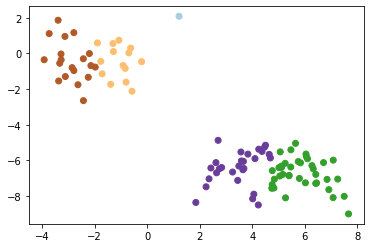

In [752]:
plt.scatter(df3['x'],df3['y'],c=y_pred,cmap="Paired")
plt.show()

In [753]:
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1) 

print('No. of cluster =',n_cluster)
print('No. of noise =', n_noise)

No. of cluster = 4
No. of noise = 1


In [754]:
print("silhouette_score: ",silhouette_score(df3,y_pred))

silhouette_score:  0.5357613883168192


when number of cluster is 4, I think Kmean is best algorithm for this dataset because points we were uniformly distributed in two parts. and also we don't see much outliers in the graph.
